In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2 as cv

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [15]:
df = pd.read_csv('vis_box1.csv')

In [16]:
df

,Unnamed: 0,X1,Y1,X2,Y2
0,0,308,16,319,0
1,1,321,13,328,5
2,2,328,16,334,1
3,3,334,13,342,5
4,4,344,13,356,5
...,...,...,...,...,...
210,210,330,454,338,443
211,211,339,454,341,452
212,212,342,454,350,443
213,213,350,454,357,443


In [7]:
img = cv.imread('diab_test.png')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

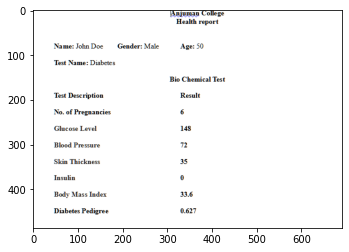

In [8]:
plt.imshow(img)
plt.plot

In [17]:
for i in range(len(df)):
    x1 = df.X1.iloc[i]
    x2 =df.X2.iloc[i]
    y1 = df.Y1.iloc[i]
    y2 = df.Y2.iloc[i]
    img = cv.rectangle(img, (x1,  y1), (x2, y2), (0, 255, 0), 2)

<function matplotlib.pyplot.show(close=None, block=None)>

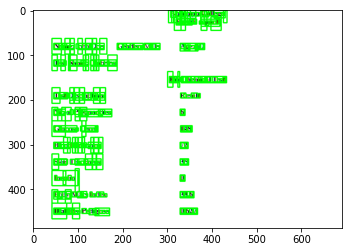

In [18]:
plt.imshow(img)
plt.show

In [20]:
cv.imwrite("ref.png", img)

True

In [1]:
import pandas as pd
df = pd.read_csv('vis_box1.csv')

In [2]:
import numpy as np

In [3]:
df.head(20)

,Unnamed: 0,X1,Y1,X2,Y2
0,0,308,16,319,0
1,1,321,13,328,5
2,2,328,16,334,1
3,3,334,13,342,5
4,4,344,13,356,5
5,5,357,13,363,5
6,6,365,13,372,5
7,7,378,12,388,1
8,8,384,15,393,1
9,9,389,12,397,5


In [4]:
df.tail(20)

,Unnamed: 0,X1,Y1,X2,Y2
195,195,53,454,62,443
196,196,59,454,70,443
197,197,71,454,79,443
198,198,76,454,85,443
199,199,81,454,92,444
200,200,93,454,99,447
201,201,100,454,105,447
202,202,109,454,119,443
203,203,120,454,126,447
204,204,125,457,134,443


In [23]:
x1, x2 =[],[]
y1, y2 =[],[]

In [24]:
ax1,ax2,ay1,ay2 = [],[],[],[]

In [25]:
def filtering(x1,y1,x2,y2):
    x1 = np.array(x1)
    y1 = np.array(y1)
    x2 = np.array(x2)
    y2 = np.array(y2)
    try:
        print(x1.min(),y2.min(),x2.max(),y1.max())
        ax1.append(x1.min())
        ay1.append(y2.min())
        ax2.append(x2.max())
        ay2.append(y1.max())
    except ValueError:
        pass
    
    

In [26]:
for i in range(len(df)):
    try:
        x = df.Y2.iloc[i]
        y = df.Y2.iloc[i+1]
        # print(x,y)
        if x > y-6 and y+6 > x:
            # print('positive')
            x1.append(df.X1.iloc[i])
            y1.append(df.Y1.iloc[i])
            x2.append(df.X2.iloc[i])
            y2.append(df.Y2.iloc[i])
        else:
            x1.append(df.X1.iloc[i])
            y1.append(df.Y1.iloc[i])
            x2.append(df.X2.iloc[i])
            y2.append(df.Y2.iloc[i])
            filtering(x1,y1,x2,y2)
            
            # print('negative')
            x1, x2 =[],[]
            y1, y2 =[],[]
    except Exception as e:
        x1.append(df.X1.iloc[i])
        y1.append(df.Y1.iloc[i])
        x2.append(df.X2.iloc[i])
        y2.append(df.Y2.iloc[i])
        filtering(x1,y1,x2,y2)
        print(e)

308 0 428 16
321 20 415 34
47 75 381 89
47 112 184 123
306 149 430 160
47 185 374 199
47 222 338 236
48 259 353 270
48 296 345 307
48 333 345 344
48 369 68 380
67 359 73 390
69 369 338 380
48 406 345 420
347 415 349 417
350 406 358 417
47 443 338 457
339 452 341 454
342 443 365 454
single positional indexer is out-of-bounds


In [27]:
print(len(ax1),len(ay1))

19 19


In [12]:
print(x1,"\n",y1,"\n",y2,"\n",x2)

[308 321 328 334 344 357 365 378 384 389 397 406 413] 
 [16 13 16 13 13 13 13 12 15 12 12 12 15] 
 [0 5 1 5 5 5 5 1 1 5 1 5 5] 
 [319 328 334 342 356 363 372 388 393 397 405 412 421]


In [7]:
import numpy as np

In [8]:
x1 = np.array(x1)
y1 = np.array(y1)
x2 = np.array(x2)
y2 = np.array(y2)


# for i in range(len(x1)):
#     print(x1[i], y1[i], x2[i], y2[i])
    

In [13]:
print(x1.min(),y1.min(),y2.max(),x2.max())

308 12 5 421


In [28]:
import cv2 as cv

In [29]:
import matplotlib.pyplot as plt

In [30]:
img = cv.imread('diab_test.png')

In [31]:
for i in range(len(ax1)):
    cv.rectangle(img, (ax1[i],  ay1[i]), (ax2[i], ay2[i]), (0, 255, 0), 2)

In [ ]:
308 12 5 421
321 31 24 409
47 86 79 373
47 123 116 177
306 160 153 424
47 196 189 368
47 233 226 174
48 270 263 346
48 307 300 150
48 344 337 337
48 380 373 61

In [45]:
cv.rectangle(img, (308,  1), (421, 16), (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

[]

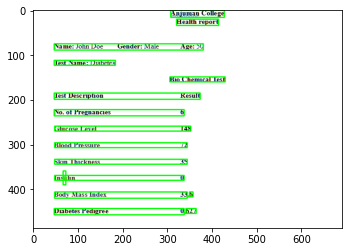

In [32]:
plt.imshow(img)
plt.plot()

In [33]:
cv.imwrite("gen7.png", img)

True

In [ ]:
i = 0
x_c1 = []
x_c2 = []
y_c1 = []
y_c2 = []
while i < len(df):
    l1 = df[df.Y2 == df.Y2[i]]
    print(i)
    x1 = l1.X1.min()
    y1 = l1.Y1.min()
    x2 = l1.X2.max()
    y2 = l1.Y2.max()
    x_c1.append(x1)
    y_c1.append(y1)
    x_c2.append(x2)
    y_c2.append(y2)
    i +=len(l1)